In [46]:
import pandas as pd
import numpy as np
import panel as pn
import holoviews as hv
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('Last 4 years data - Dataset.csv',low_memory=False)
data

,Item_Name,Colour Group,Sales Qty (SQM),Sales,Billing Month,Year
0,AL45,AD,56.559,56.559,01-Apr-18,2018
1,AL45,AD,100.467,100.467,01-Apr-18,2018
2,AL45,AD,13.396,13.396,01-Apr-18,2018
3,AL45,AD,26.791,26.791,01-Apr-18,2018
4,AL45,AD,14.884,14.884,01-Apr-18,2018
...,...,...,...,...,...,...
317880,B_Grade,Normal,2.977,2.977,01-Mar-22,2022
317881,B_Grade,Normal,59.54,59.54,01-Mar-22,2022
317882,B_Grade,Normal,89.31,89.31,01-Mar-22,2022
317883,B_Grade,Normal,13.395,13.395,01-Mar-22,2022


In [3]:
data["Product"]=data["Item_Name"].astype('str')
data["Shades"]=data["Colour Group"].astype('str')
data

,Item_Name,Colour Group,Sales Qty (SQM),Sales,Billing Month,Year,Product,Shades
0,AL45,AD,56.559,56.559,01-Apr-18,2018,AL45,AD
1,AL45,AD,100.467,100.467,01-Apr-18,2018,AL45,AD
2,AL45,AD,13.396,13.396,01-Apr-18,2018,AL45,AD
3,AL45,AD,26.791,26.791,01-Apr-18,2018,AL45,AD
4,AL45,AD,14.884,14.884,01-Apr-18,2018,AL45,AD
...,...,...,...,...,...,...,...,...
317880,B_Grade,Normal,2.977,2.977,01-Mar-22,2022,B_Grade,Normal
317881,B_Grade,Normal,59.54,59.54,01-Mar-22,2022,B_Grade,Normal
317882,B_Grade,Normal,89.31,89.31,01-Mar-22,2022,B_Grade,Normal
317883,B_Grade,Normal,13.395,13.395,01-Mar-22,2022,B_Grade,Normal


In [4]:
data2=data.drop(["Billing Month","Sales Qty (SQM)","Item_Name","Colour Group"],axis=1)

In [5]:
data2.head()

,Sales,Year,Product,Shades
0,56.559,2018,AL45,AD
1,100.467,2018,AL45,AD
2,13.396,2018,AL45,AD
3,26.791,2018,AL45,AD
4,14.884,2018,AL45,AD


In [6]:
data2.tail()

,Sales,Year,Product,Shades
317880,2.977,2022,B_Grade,Normal
317881,59.54,2022,B_Grade,Normal
317882,89.31,2022,B_Grade,Normal
317883,13.395,2022,B_Grade,Normal
317884,93.025,2022,B_Grade,Normal


In [7]:
data2.count()

Sales      317885
Year       317885
Product    317885
Shades     317885
dtype: int64

In [8]:
data2["Sales"]=pd.to_numeric(data2["Sales"],errors='coerce')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317885 entries, 0 to 317884
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Sales    317694 non-null  float64
 1   Year     317885 non-null  int64  
 2   Product  317885 non-null  object 
 3   Shades   317885 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 9.7+ MB


In [9]:
data2.describe()

,Sales,Year
count,317694.000000,317885.000000
mean,44.054845,2019.872746
std,115.702277,1.218472
min,-3747.000000,2018.000000
25%,8.930000,2019.000000
50%,22.325000,2020.000000
75%,44.652000,2021.000000
max,26229.000000,2022.000000


In [10]:
data2.columns


Index(['Sales', 'Year', 'Product', 'Shades'], dtype='object')

In [11]:
data2.shape

(317885, 4)

In [12]:
data2.isnull().sum()

Sales      191
Year         0
Product      0
Shades       0
dtype: int64

In [13]:
data2.dropna(inplace=True)

In [14]:
data2.isnull().sum()

Sales      0
Year       0
Product    0
Shades     0
dtype: int64

Which year had the highest sales?


In [15]:
import pandas as pd
df=pd.DataFrame(data2.groupby('Year').sum()['Sales'])
df


,Sales
Year,
2018,2.537060e+06
2019,3.616404e+06
2020,2.865160e+06
2021,3.824853e+06
2022,1.152482e+06


## The Highest Sales trend was 2021

In [16]:
df=df.sort_values('Sales',ascending=False)
df

,Sales
Year,
2021,3.824853e+06
2019,3.616404e+06
2020,2.865160e+06
2018,2.537060e+06
2022,1.152482e+06


In [49]:
df2=data2.groupby(['Shades','Product'])
df2.first()


Sales  Year
Shades Product               
AD     AL312      2.977  2018
       AL32      68.471  2018
       AL32+     -2.980  2020
       AL332     59.536  2018
       AL33D     40.187  2018
...                 ...   ...
Zinc   AL45      38.016  2018
nan    AL33D    244.000  2019
       AL33R      0.000  2018
       AL45       2.977  2022
       AL63       8.930  2019

[132 rows x 2 columns]

<h2> Highest Product Sales

In [18]:
df3=pd.DataFrame(data2.groupby('Year').count()['Product'])
df3=df3.sort_values('Product',ascending=False)
df3

,Product
Year,
2021,92758
2019,78303
2020,70226
2018,51864
2022,24543


<h2>Highest Unique Product Sales

In [19]:
df3=df3.sort_values('Product',ascending=False)
df3

,Product
Year,
2021,92758
2019,78303
2020,70226
2018,51864
2022,24543


In [20]:
n=data.Product.unique()
print (n)

['AL45' 'AL332' 'AL33F' 'AL33R' 'AL43D' 'AL43R' 'AL32' 'AL312' 'AL451'
 'AL33D' 'AW315' 'AL35' 'AL65' 'AL63' 'AL445' 'B_Grade' 'B_GRADE'
 '3MM_B-Grade' 'AL33O' '4MM_B-Grade' 'Aluwall' 'AL32+' 'AL42' 'AL43F']


In [21]:
print(pd.unique(data['Shades']))


['AD' 'Exclusive' 'Timber' 'Cortina' 'Crinkle' 'Rustic' 'Gloss-Metallic'
 'Gloss-Solid' 'Exclusive1' 'Sand' 'Sparkling' 'Impression'
 'PE05,10,11,12,13' 'Embossed Pinhole' 'Stone' 'Pedra' 'Magic' 'Aluwall'
 'Petroleum' 'Copper' 'Zinc' 'Super Gloss' 'Peerless' 'Timber1'
 'Embossed Stucco' 'HPL' 'nan' 'Separator' 'Titanium' 'Gloz'
 'Aluwall_Platinum' 'White' 'Mirror' 'Normal' 'Carten Steel' 'Metal Stact'
 'Dual']


<h2>Itemwsie Dashboard

In [22]:
item=pd.read_csv('itemwsie.csv',low_memory=False)
item.info()
item.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317888 entries, 0 to 317887
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Item_Name        317888 non-null  object
 1   Colour           317680 non-null  object
 2   Colour Group     317872 non-null  object
 3   Colour_Category  317875 non-null  object
 4   Sales Qty (SQM)  317888 non-null  object
 5   FY               317888 non-null  object
dtypes: object(6)
memory usage: 14.6+ MB


,Item_Name,Colour,Colour Group,Colour_Category,Sales Qty (SQM),FY
count,317888,317680,317872,317875,317888,317888
unique,24,665,36,3,11384,4
top,AL33R,AD21,AD,Normal,8.93,FY22
freq,126602,25668,214778,237135,16212,90528


In [23]:
item["Year"]=item["FY"].str[2:4].astype('int32')
item["SalesQty"]=item["Sales Qty (SQM)"].replace(",","")
item["SalesQty"]=pd.to_numeric(item["SalesQty"],errors='coerce')

item.dtypes

Item_Name           object
Colour              object
Colour Group        object
Colour_Category     object
Sales Qty (SQM)     object
FY                  object
Year                 int32
SalesQty           float64
dtype: object

In [24]:
item.head()

,Item_Name,Colour,Colour Group,Colour_Category,Sales Qty (SQM),FY,Year,SalesQty
0,AL45,AD01,AD,Normal,56.559,FY19,19,56.559
1,AL45,AD01,AD,Normal,100.467,FY19,19,100.467
2,AL45,AD01,AD,Normal,13.396,FY19,19,13.396
3,AL45,AD01,AD,Normal,26.791,FY19,19,26.791
4,AL45,AD202,AD,Normal,14.884,FY19,19,14.884


In [26]:
item1=pd.DataFrame(item.groupby('Year').count()['Item_Name'])
item1=item1.sort_values('Item_Name',ascending=False)
item1

,Item_Name
Year,
22,90528
21,78432
20,77561
19,71367


In [27]:
item.drop(["FY","Sales Qty (SQM)"],axis=1)


,Item_Name,Colour,Colour Group,Colour_Category,Year,SalesQty
0,AL45,AD01,AD,Normal,19,56.559
1,AL45,AD01,AD,Normal,19,100.467
2,AL45,AD01,AD,Normal,19,13.396
3,AL45,AD01,AD,Normal,19,26.791
4,AL45,AD202,AD,Normal,19,14.884
...,...,...,...,...,...,...
317883,B_Grade,BGRADE,Normal,Normal,22,13.395
317884,B_Grade,BGRADE,Normal,Normal,22,93.025
317885,B_Grade,BGRADE,Normal,Normal,22,687.610
317886,B_Grade,BGRADE,Normal,Normal,22,-687.610


In [28]:
item.dtypes

Item_Name           object
Colour              object
Colour Group        object
Colour_Category     object
Sales Qty (SQM)     object
FY                  object
Year                 int32
SalesQty           float64
dtype: object

In [29]:
item2=pd.DataFrame(item.groupby('Year').sum()['SalesQty'])
item2=item2.sort_values('SalesQty',ascending=False)
item2

,SalesQty
Year,
22,3.895866e+06
20,3.463601e+06
19,3.378590e+06
21,3.098143e+06


(array([71367.,     0.,     0., 77561.,     0.,     0., 78432.,     0.,
            0., 90528.]),
 array([19. , 19.3, 19.6, 19.9, 20.2, 20.5, 20.8, 21.1, 21.4, 21.7, 22. ]),
 <BarContainer object of 10 artists>)

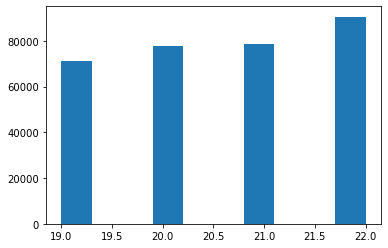

In [30]:
plt.hist(item['Year'])


In [31]:
item3=pd.DataFrame(item.groupby('Item_Name').count()['SalesQty'])
item3=item3.sort_values('SalesQty',ascending=False)
item3

,SalesQty
Item_Name,
AL33R,126537
AL32,71147
AL332,24095
AL43R,21067
AL312,18182
AL45,14464
Aluwall,13839
AL33D,11270
AW315,8296


In [32]:
item["Item_Name"]=item["Item_Name"].astype('category')
item.dtypes

Item_Name          category
Colour               object
Colour Group         object
Colour_Category      object
Sales Qty (SQM)      object
FY                   object
Year                  int32
SalesQty            float64
dtype: object

Encoding the Categorical Variables

In [33]:
item["Item_Code"]=item["Item_Name"].cat.codes
item

,Item_Name,Colour,Colour Group,Colour_Category,Sales Qty (SQM),FY,Year,SalesQty,Item_Code
0,AL45,AD01,AD,Normal,56.559,FY19,19,56.559,16
1,AL45,AD01,AD,Normal,100.467,FY19,19,100.467,16
2,AL45,AD01,AD,Normal,13.396,FY19,19,13.396,16
3,AL45,AD01,AD,Normal,26.791,FY19,19,26.791,16
4,AL45,AD202,AD,Normal,14.884,FY19,19,14.884,16
...,...,...,...,...,...,...,...,...,...
317883,B_Grade,BGRADE,Normal,Normal,13.395,FY22,22,13.395,23
317884,B_Grade,BGRADE,Normal,Normal,93.025,FY22,22,93.025,23
317885,B_Grade,BGRADE,Normal,Normal,687.61,FY22,22,687.610,23
317886,B_Grade,BGRADE,Normal,Normal,-687.61,FY22,22,-687.610,23


In [34]:
n=pd.unique(item['Item_Name'])
print(pd.unique(item['Item_Name']))
print(pd.unique(item['Colour_Category']))
print(pd.unique(item['Colour Group']))
print(pd.unique(item['Colour']))

['AL45', 'AL332', 'AL33F', 'AL33R', 'AL43D', ..., '4MM_B-Grade', 'Aluwall', 'AL32+', 'AL42', 'AL43F']
Length: 24
Categories (24, object): ['3MM_B-Grade', '4MM_B-Grade', 'AL312', 'AL32', ..., 'AW315', 'Aluwall', 'B_GRADE', 'B_Grade']
['Normal' 'Special' 'Aluwall' nan]
['AD' 'Exclusive' 'Timber' 'Cortina' 'Crinkle' 'Rustic' 'Gloss-Metallic'
 'Gloss-Solid' 'Exclusive1' 'Sand' 'Sparkling' 'Impression'
 'PE05,10,11,12,13' 'Embossed Pinhole' 'Stone' 'Pedra' 'Magic' 'Aluwall'
 'Petroleum' 'Copper' 'Zinc' 'Super Gloss' 'Peerless' 'Timber1'
 'Embossed Stucco' 'HPL' nan 'Separator' 'Titanium' 'Gloz'
 'Aluwall_Platinum' 'White' 'Mirror' 'Normal' 'Carten Steel' 'Metal Stact'
 'Dual']
['AD01' 'AD202' 'AD32' 'AD556' 'AD306' 'AD102' 'AD131' 'SP05I' 'TI24'
 'AD1003' 'AD22' 'AD194' 'AD161' 'AD509' 'CT12' 'AD301' 'AD7001' 'CR01'
 'CT10' 'AD08' 'AD21' 'AD31' 'AD83' 'CT15' 'TI04' 'TI19' 'AD02' 'AD112'
 'AD121' 'AD132' 'AD195' 'AD506' 'AD77' 'MT5011' 'SH1320' 'AD1310' 'AD152'
 'SH1730' 'AD06' 'TI01' 'AD09'

In [ ]:
Items=['AL45', 'AL332', 'AL33F', 'AL33R', 'AL43D', ..., '4MM_B-Grade', 'Aluwall', 'AL32+', 'AL42', 'AL43F']


In [40]:
Year=pn.widgets.IntSlider(name='Year Range',start=2019,end=2022,step = 1)
Year

IntSlider(end=2022, name='Year Range', start=2019, value=2019)

In [ ]:
title='###Sales Qty-ItemWise'
subtitle='###Yearly Itemwise SalesQty with interactive dashboard and ploting'

In [42]:
def get_plot(Item_Name,Year):
    df=item
    df['Year']=pd.to_datetime(df['Year'])
    start_year=Year.value[2018]
    end_year=Year.value[2022]
    mask=df(['Year'>start_year])(df['Year']<=end_year)
    df=df.loc[mask]
    chart=alt.Chart(df).mark_line().encode(x='Year',y='SalesQty',tooltip=alt.Tooltip(['Year','SalesQty'])).transfrom_filter((datum.symbol=='Item_Names'))
    return chart


Team wise acheivement against Sales Qty


In [ ]:
year_slider=pn.widgets.IntSlider(name='Year slider',start=2018,end=2021,step=1,value=2018)
year_slider

In [45]:
df=data.groupby(['Product','Shades','Sales'])
df.head()


,Item_Name,Colour Group,Sales Qty (SQM),Sales,Billing Month,Year,Product,Shades
0,AL45,AD,56.559,56.559,01-Apr-18,2018,AL45,AD
1,AL45,AD,100.467,100.467,01-Apr-18,2018,AL45,AD
2,AL45,AD,13.396,13.396,01-Apr-18,2018,AL45,AD
3,AL45,AD,26.791,26.791,01-Apr-18,2018,AL45,AD
4,AL45,AD,14.884,14.884,01-Apr-18,2018,AL45,AD
...,...,...,...,...,...,...,...,...
317866,B_Grade,Normal,398.918,398.918,01-Mar-22,2022,B_Grade,Normal
317867,B_Grade,Normal,413.031,413.031,01-Mar-22,2022,B_Grade,Normal
317868,B_Grade,Normal,468.825,468.825,01-Mar-22,2022,B_Grade,Normal
317871,B_Grade,Normal,893,893,01-Mar-22,2022,B_Grade,Normal


How many Unique Items We are having?
